# Mads Notebook: Contamination Problem

[MADS](http://madsjulia.github.io/Mads.jl) is an integrated high-performance computational framework for data/model/decision analyses.

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/madsjulia/Mads.jl/master/logo/mads_black_swan_logo_big_text_new_3inch.png" alt="MADS" width=20% max-width=125px;/>
</div>

[MADS](http://madsjulia.github.io/Mads.jl) can be applied to perform:

* Sensitivity Analysis
* Parameter Estimation
* Model Inversion and Calibration
* Uncertainty Quantification
* Model Selection and Model Averaging
* Model Reduction and Surrogate Modeling
* Machine Learning (e.g., Blind Source Separation, Source Identification, Feature Extraction, Matrix / Tensor Factorization, etc.)
* Decision Analysis and Support

Here, it is demonstrated how [MADS](http://madsjulia.github.io/Mads.jl) can be applied to solve a general groundwater contamination problem.

[MADS](http://madsjulia.github.io/Mads.jl) includes analytical solver called [Anasol.jl](http://madsjulia.github.io/Anasol.jl) which is appied to solve the groundwater contamination transport in a aquifer as presetned below.

## Problem setup

Import Mads (if **MADS** is not installed, first execute in the Julia REPL: 

```julia
import Pkg
Pkg.add("Mads")`)
```

In [1]:
import Mads

┌ Info: Precompiling Mads [d6bdc55b-bd94-5012-933c-1f73fc2ee992]
└ @ Base loading.jl:1317


Mads: Model Analysis & Decision Support
====

    ___      ____            ____    ____              ______
   /   \    /    \          /    |  |    \            /  __  \
  |     \  /     |         /     |  |     \          /  /  \__\
  |  |\  \/  /|  |        /      |  |      \        |  |
  |  | \    / |  |       /  /|   |  |   |\  \        \  \______.
  |  |  \__/  |  |      /  / |   |  |   | \  \        \_______  \
  |  |        |  |     /  /  |   |  |   |  \  \               \  \
  |  |        |  |    /  /===|   |  |   |___\  \    __.        |  |
  |  |        |  |   /  /    |   |  |           \   \  \______/  /
  |__|        |__|  /__/     |___|  |____________\   \__________/

MADS is an integrated high-performance computational framework for data- and model-based analyses.
MADS can perform: Sensitivity Analysis, Parameter Estimation, Model Inversion and Calibration, Uncertainty Quantification, Model Selection and Model Averaging, Model Reduction and Surrogate Modeling, Machine L

  ** incremental compilation may be fatally broken for this module **

    Updating registry at `~/.julia/registries/General`
┌ Warning: could not download https://pkg.julialang.org/registries
└ @ Pkg.Types /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Types.jl:980
   Resolving package versions...
[ Info: Module BIGUQ is not available!
┌ Info: Installing pyqt package to avoid buggy tkagg backend.
└ @ PyPlot /Users/vvv/.julia/packages/PyPlot/XHEG0/src/init.jl:118


### Setup the working directory

In [2]:
cd(joinpath(Mads.dir, "examples", "contamination"))

### Load Mads input file

In [3]:
md = Mads.loadmadsfile("w01.mads")

Dict{String, Any} with 7 entries:
  "Grid"         => Dict{Any, Any}("zmax"=>50, "time"=>50, "xcount"=>33, "zcoun…
  "Sources"      => Dict{Any, Any}[Dict("box"=>Dict{Any, Any}("dz"=>Dict{Any, A…
  "Parameters"   => OrderedCollections.OrderedDict{String, OrderedCollections.O…
  "Wells"        => OrderedCollections.OrderedDict{String, Any}("w1a"=>Dict{Any…
  "Time"         => Dict{Any, Any}("step"=>1, "start"=>1, "end"=>50)
  "Observations" => OrderedCollections.OrderedDict{Any, Any}("w1a_1"=>OrderedCo…
  "Filename"     => "w01.mads"

### Plot

Generate a plot of the loaded problem showing the well locations and the location of the contaminant source:

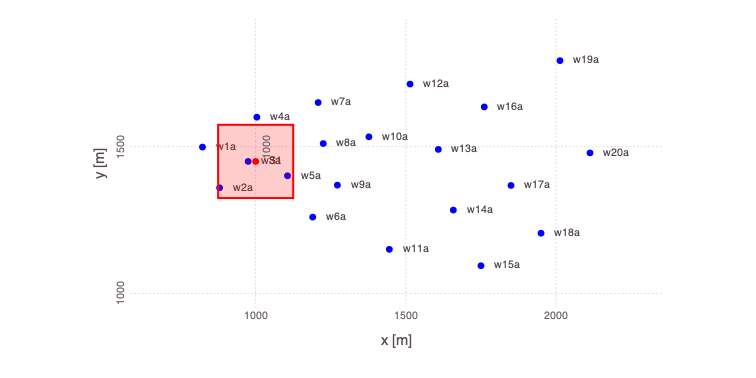

In [4]:
Mads.plotmadsproblem(md, keyword="all_wells")

There are 20 monitoring wells.
Each well has 2 measurement ports: shallow (3 m below the water table labeled `a`) and deep (33 m below the water table labeled `b`).
Contaminant concentrations are observed for 50 years at each well.
The contaminant transport is solved using the `Anasol` package in Mads.

### Unknown model parameters

* Start time of contaminant release $t_0$
* End time of contaminant release $t_1$
* Advective pore velocity $v$

### Reduced model setup 

Analysis of the data from only 2 monitoring locations: `w13a` and `w20a`.

In [5]:
Mads.allwellsoff!(md) # turn off all wells
Mads.wellon!(md, "w13a") # use well w13a
Mads.wellon!(md, "w20a") # use well w20a

OrderedCollections.OrderedDict{Any, Any} with 100 entries:
  "w13a_1"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_2"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_3"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_4"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_5"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_6"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_7"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_8"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_9"  => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_10" => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_11" => OrderedCollections.OrderedDict{Any, Any}("well"=>"w13a", "time"=…
  "w13a_12" => OrderedCollections.OrderedDict{Any,


Generate a plot of the updated problem showing the 2 well locations applied in the analyses as well as the location of the contaminant source:

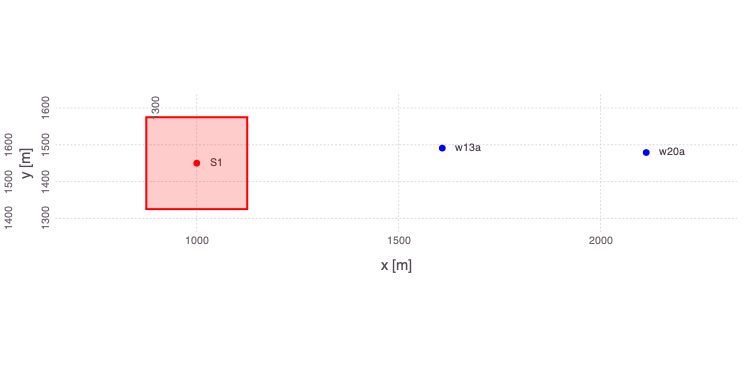

In [6]:
Mads.plotmadsproblem(md; keyword="w13a_w20a")

## Initial estimates

Plot initial estimates of the contamiant concentrations at the 2 monitoring wells based on the initial model parameters: 

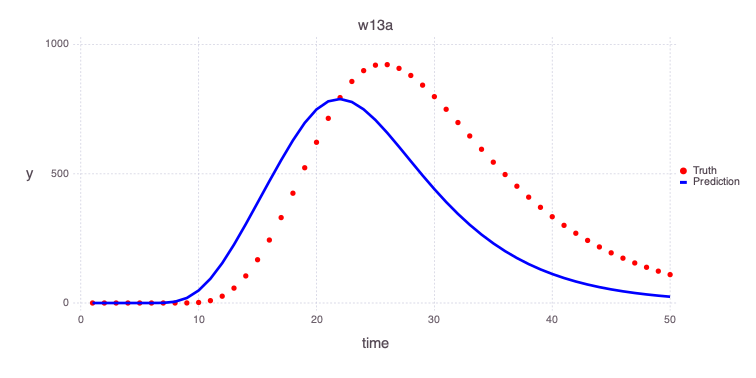

In [7]:
Mads.plotmatches(md, "w13a"; display=true)

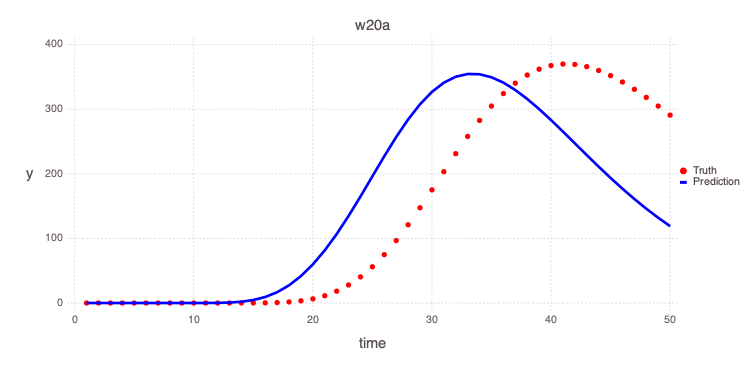

In [8]:
Mads.plotmatches(md, "w20a"; display=true)

## Model calibration

Execute model calibration based on the concentrations observed in the two monitoring wells:

In [9]:
calib_param, calib_results = Mads.calibrate(md)

(OrderedCollections.OrderedDict("n" => 0.1, "rf" => 1.0, "lambda" => 0.0, "theta" => 0.0, "vx" => 31.059669248076222, "vy" => 0.0, "vz" => 0.0, "ax" => 70.0, "ay" => 15.0, "az" => 0.3…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [0.740931532960472, -0.20135792079033074, -0.44291104407363896], [0.6737086338839451, 0.007322888567510982, -0.34261232076929443], 41650.46179056277, 13, false, true, 0.0001, 0.0, false, 0.001, 0.0, false, 1.0e-6, 0.0, false, Iter     Function value   Gradient norm 
------   --------------   --------------
, 170, 13, 0))

Compute forward model predictions based on the calibrated model parameters:

In [10]:
calib_predictions = Mads.forward(md, calib_param)

OrderedCollections.OrderedDict{Any, Float64} with 100 entries:
  "w13a_1"  => 0.0
  "w13a_2"  => 0.0
  "w13a_3"  => 0.0
  "w13a_4"  => 0.0
  "w13a_5"  => 0.0
  "w13a_6"  => 4.79956e-11
  "w13a_7"  => 0.000284228
  "w13a_8"  => 0.0590933
  "w13a_9"  => 0.92868
  "w13a_10" => 5.08796
  "w13a_11" => 16.2469
  "w13a_12" => 37.7882
  "w13a_13" => 71.6886
  "w13a_14" => 118.275
  "w13a_15" => 176.509
  "w13a_16" => 244.465
  "w13a_17" => 319.785
  "w13a_18" => 400.036
  "w13a_19" => 482.934
  "w13a_20" => 566.28
  "w13a_21" => 647.03
  "w13a_22" => 720.732
  "w13a_23" => 782.658
  "w13a_24" => 829.249
  "w13a_25" => 858.781
  ⋮         => ⋮

Plot the predicted estimates of the contamiant concentrations at the 2 monitoring wells based on the estimated model parameters based on the performed model calibration: 

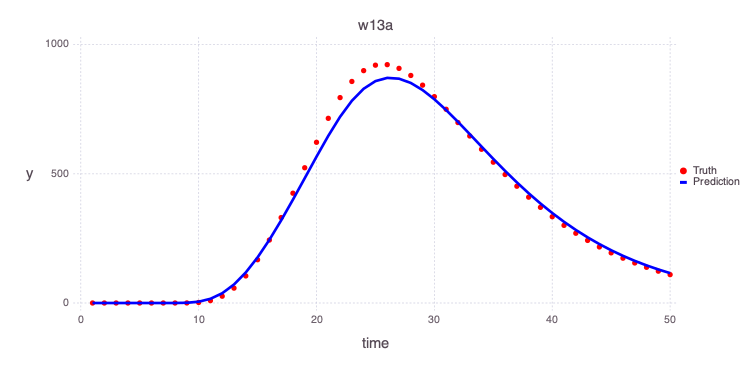

In [11]:
Mads.plotmatches(md, calib_predictions, "w13a")

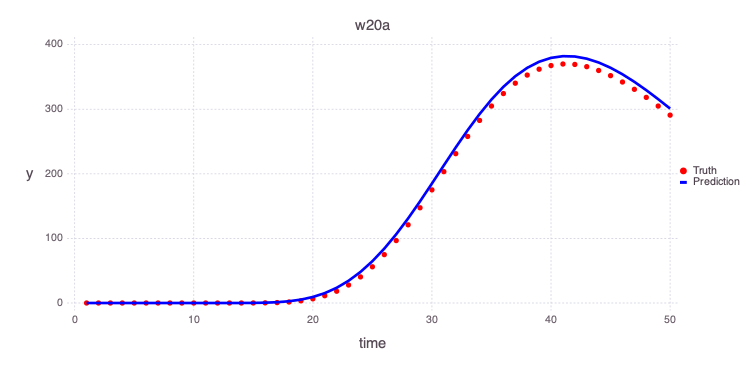

In [12]:
Mads.plotmatches(md, calib_predictions, "w20a")

Initial values of the optimized model parameters are:

In [13]:
Mads.showparameters(md)

Pore x velocity [L/T] : vx       =              40 log-transformed min = 0.01 max = 200.0 
Start Time [T]        : source1_t0 =               4 min = 0.0 max = 10.0 
End Time [T]          : source1_t1 =              15 min = 5.0 max = 40.0 
Number of optimizable parameters: 3


Estimated values of the optimized model parameters are:

In [14]:
Mads.showparameterestimates(md, calib_param)

3-element Vector{Pair{String, Float64}}:
         "vx" => 31.059669248076222
 "source1_t0" => 5.036614115598699
 "source1_t1" => 16.62089724181972